<a href="https://colab.research.google.com/github/Haniaakanwal/DIP-TASK/blob/main/Dip_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================
# THRESHOLDING & SEGMENTATION - STEP 1: IMPORT LIBRARIES
# ============================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("Libraries imported successfully!")


Libraries imported successfully!


Please upload a color image (PNG, JPG, etc.):


Saving task12.webp to task12.webp
Uploaded Image: task12.webp


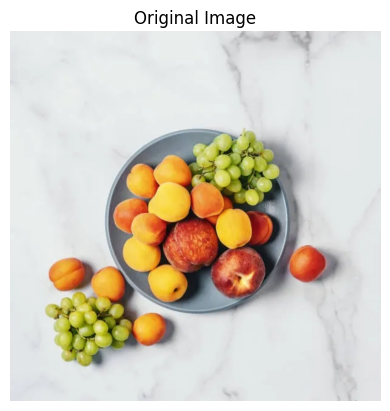

In [2]:
# ============================================
# STEP 2: UPLOAD IMAGE
# ============================================

print("Please upload a color image (PNG, JPG, etc.):")
uploaded = files.upload()
image_name = list(uploaded.keys())[0]
print("Uploaded Image:", image_name)

# Read color image
img_color = cv2.imread(image_name)

# Convert to grayscale
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Display Original Image
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()


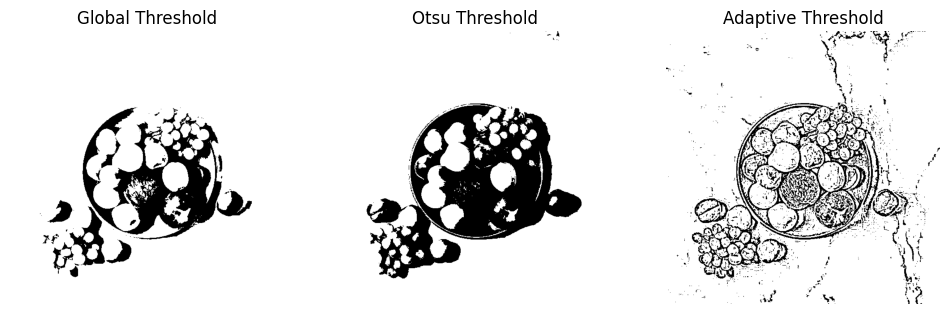

In [3]:
# ============================================
# STEP 3: THRESHOLDING
# ============================================

# Global Thresholding
_, global_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Otsu Thresholding
_, otsu_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    img_gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

# Display thresholding results
titles = ["Global Threshold", "Otsu Threshold", "Adaptive Threshold"]
images = [global_thresh, otsu_thresh, adaptive_thresh]

plt.figure(figsize=(12,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


In [4]:
# ============================================
# STEP 4: K-MEANS SEGMENTATION FUNCTION
# ============================================

def kmeans_segmentation(image, k):
    Z = image.reshape((-1,3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    segmented = centers[labels.flatten()]
    return segmented.reshape(image.shape)


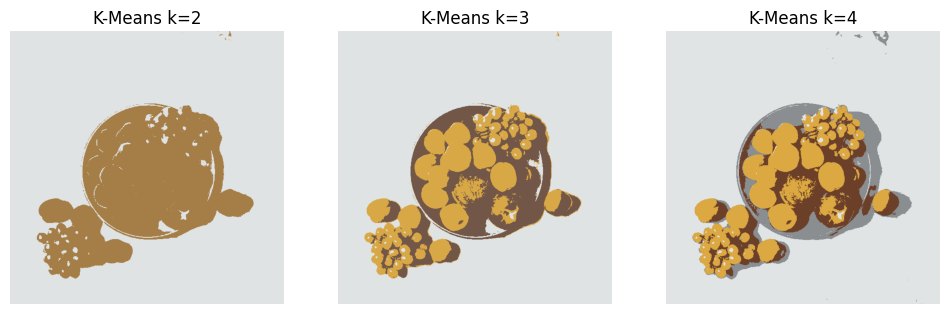

In [5]:
# ============================================
# STEP 5: K-MEANS SEGMENTATION
# ============================================

k2 = kmeans_segmentation(img_color, 2)
k3 = kmeans_segmentation(img_color, 3)
k4 = kmeans_segmentation(img_color, 4)

# Display K-Means results
titles = ["K-Means k=2", "K-Means k=3", "K-Means k=4"]
images = [k2, k3, k4]

plt.figure(figsize=(12,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()


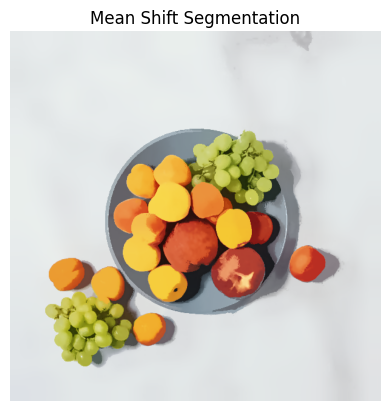

In [6]:
# ============================================
# STEP 6: MEAN SHIFT SEGMENTATION
# ============================================

mean_shift = cv2.pyrMeanShiftFiltering(img_color, sp=20, sr=40)

# Display result
plt.imshow(cv2.cvtColor(mean_shift, cv2.COLOR_BGR2RGB))
plt.title("Mean Shift Segmentation")
plt.axis('off')
plt.show()


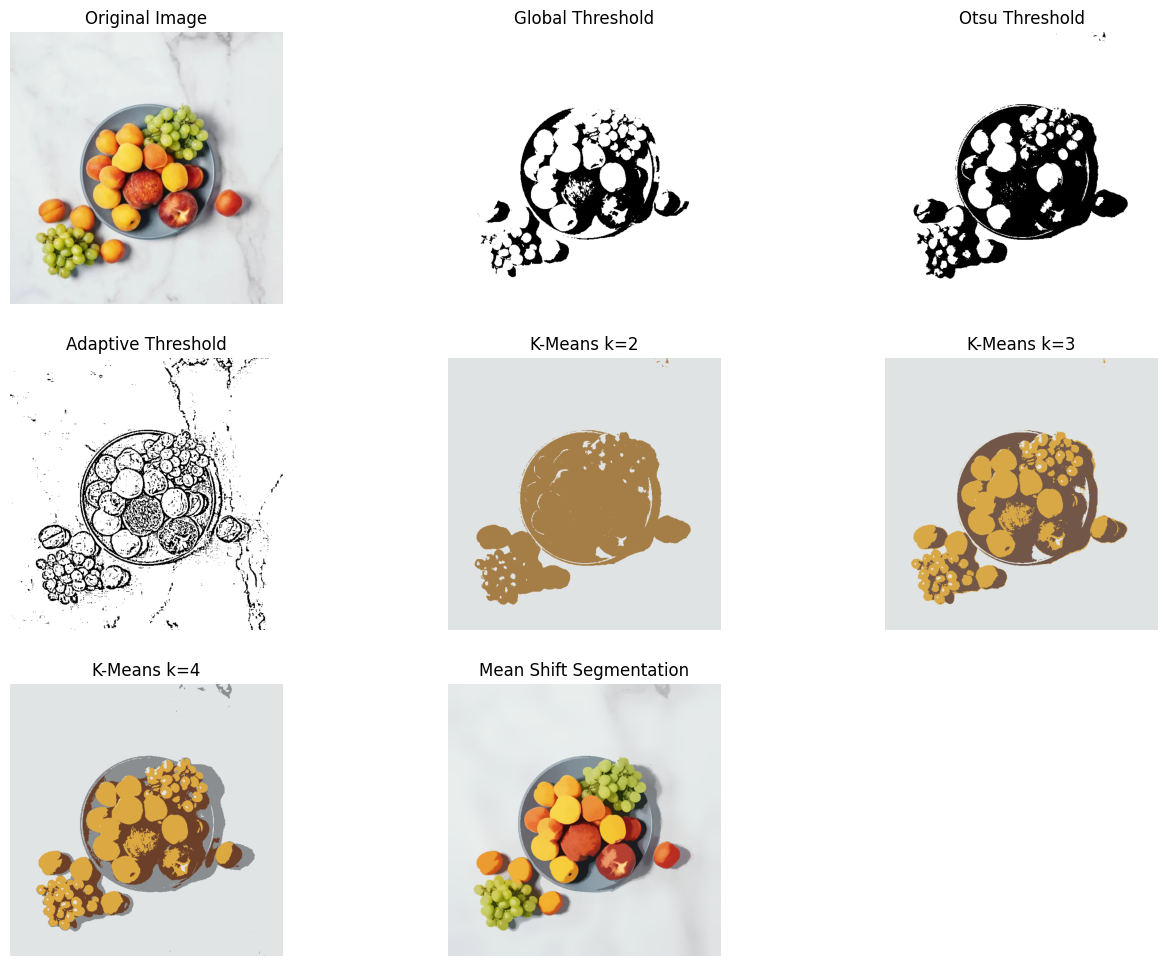

In [7]:
# ============================================
# STEP 7: COMPARISON OF ALL SEGMENTATION METHODS
# ============================================

titles = [
    "Original Image",
    "Global Threshold",
    "Otsu Threshold",
    "Adaptive Threshold",
    "K-Means k=2",
    "K-Means k=3",
    "K-Means k=4",
    "Mean Shift Segmentation"
]

images = [
    img_color,
    global_thresh,
    otsu_thresh,
    adaptive_thresh,
    k2,
    k3,
    k4,
    mean_shift
]

plt.figure(figsize=(16,12))
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()
